# _Euro to USD Conversion - Time Series Analysis Project_
**_Importing The Required Libraries & Packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command and displaying the first five record_**

In [2]:
df = pd.read_csv('BOE-XUDLERD.csv')
df.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


## _Exploratory Data Analysis (EDA)_
**_Getting the shape of the dataset_**

In [3]:
df.shape

(10837, 2)

**_Checking for the null values in the column from the dataset_**

In [4]:
df.isnull().sum()

Date     0
Value    0
dtype: int64

**_Checking for the duplicate value in the dataset_**

In [5]:
df.duplicated().sum()

0

**_Checking the data type of the column in the dataset_**

In [6]:
df.dtypes

Date      object
Value    float64
dtype: object

**_Getting the summary of various descriptive statistics for the numeric column in the dataset_**

In [7]:
df.describe()

,Value
count,10837.000000
mean,0.864988
std,0.153289
min,0.626000
25%,0.759800
50%,0.826300
75%,0.920300
max,1.551900


## _Data Preprocessing_
**_Changing the data type of `Date` column as <span Style= 'color:red'> Date </span> using pandas command_**

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

**_Changing the `Date` columns as the index column of the dataset and also displaying the first five records of the dataset_**

In [9]:
df.set_index('Date',inplace = True)

## _Data Processing & Visualization_
**_Plotting the line graph to show the data trend in the dataset and saving the graph as PNG File_**

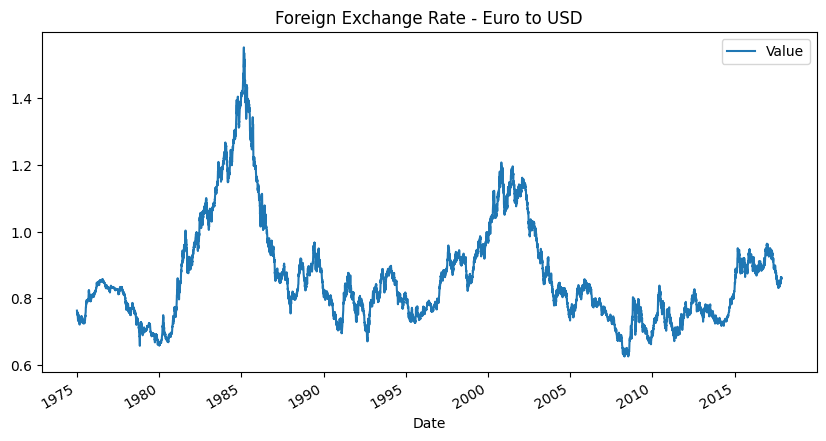

In [10]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - Euro to USD')
plt.savefig('Foreign Exchange Rate - Euro to USD.png')
plt.show()

**_Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [11]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  2237


,Value
Date,
1975-01-05,0.76090
1975-01-12,0.75346
1975-01-19,0.75546
1975-01-26,0.74388
1975-02-02,0.73902


**_Plotting the line graph to show the data trend in the weekly resampled dataset and saving the graph as PNG File_**

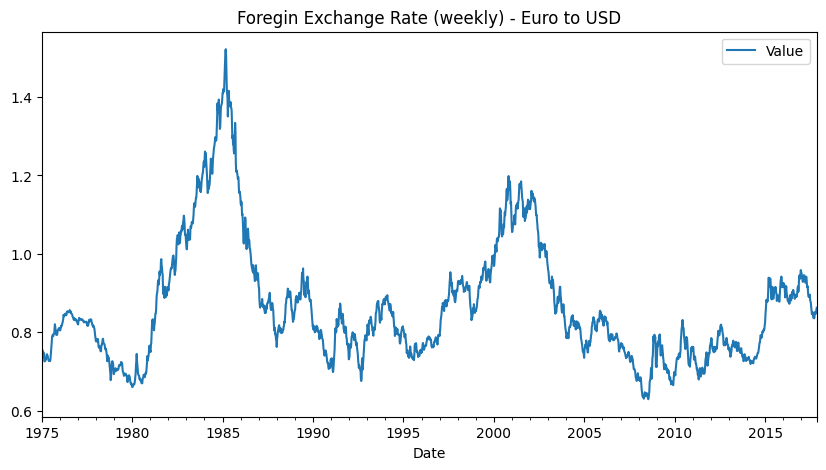

In [12]:
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - Euro to USD')
plt.savefig('Foregin Exchange Rate (weekly) - Euro to USD.png')
plt.show()

**_Resampling the dataset to monthly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [13]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  515


,Value
Date,
1975-01-31,0.749132
1975-02-28,0.737910
1975-03-31,0.730337
1975-04-30,0.741623
1975-05-31,0.731286


**_Plotting the line graph to show the data trend in the monthly resampled dataset and saving the graph as PNG File_**

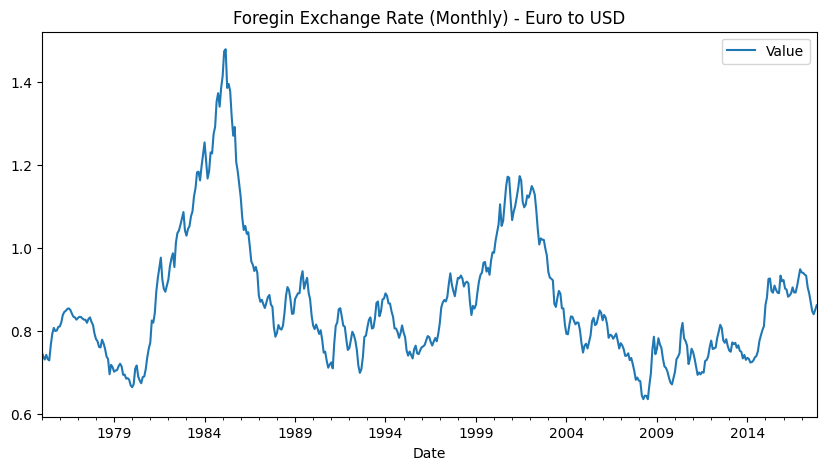

In [14]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - Euro to USD')
plt.savefig('Foregin Exchange Rate (Monthly) - Euro to USD')
plt.show()

**_Resampling the dataset to yearly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [15]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  43


,Value
Date,
1975-12-31,0.766268
1976-12-31,0.837672
1977-12-31,0.823871
1978-12-31,0.747492
1979-12-31,0.697025


**_Plotting the line graph to show the data trend in the yearly resampled dataset and saving the graph as PNG File_**

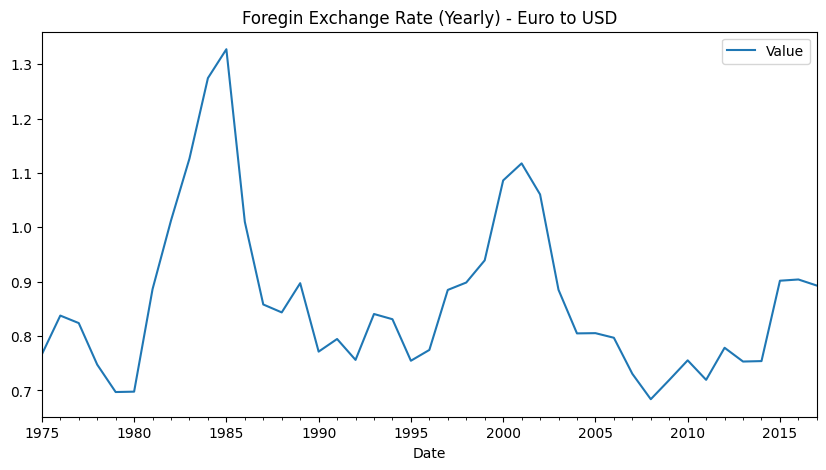

In [16]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - Euro to USD')
plt.savefig('Foregin Exchange Rate (Yearly) - Euro to USD.png')
plt.show()

**_Plotting the scatter plot to show the data trend in the weekly resampled dataset and saving the graph as PNG File. And by observing all the above resampled graph , weekly resampled data has more clear peak and perks among all resample data_**

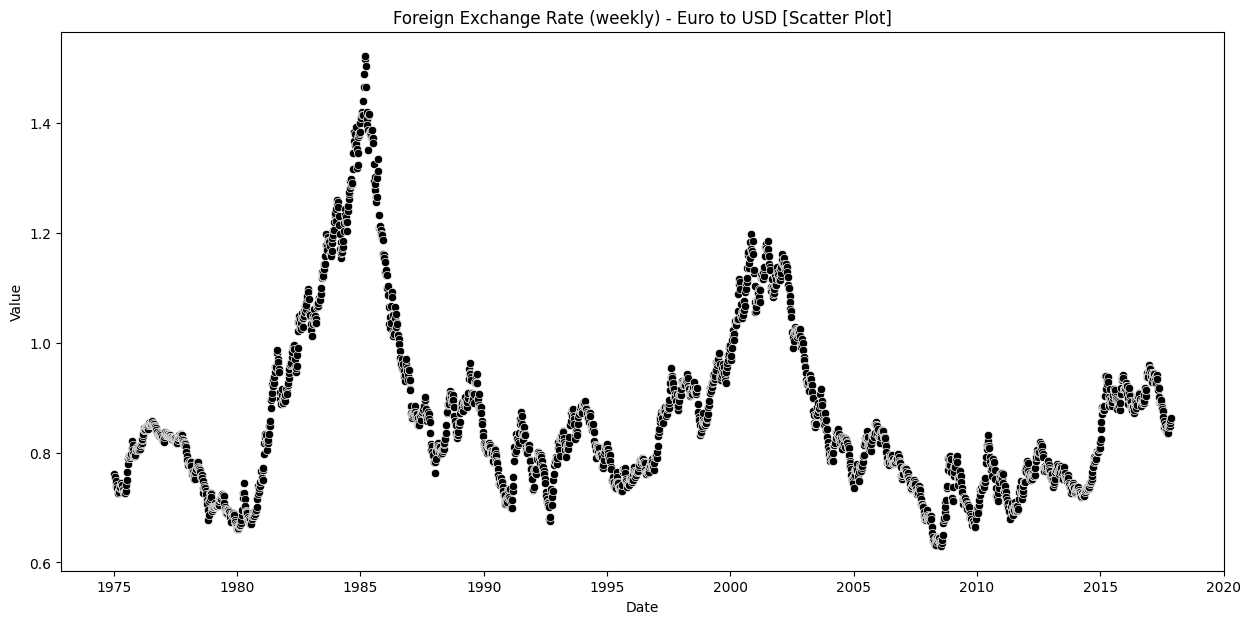

In [17]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_week.index , y = df_week.Value , color = 'black')
plt.title('Foreign Exchange Rate (weekly) - Euro to USD [Scatter Plot]')
plt.savefig('Foreign Exchange Rate (weekly) - Euro to USD [Scatter Plot].png')
plt.show()

**_Plotting the dist plot using seaborn to show the data spread in the resampled weekly dataset and saving the png file._**

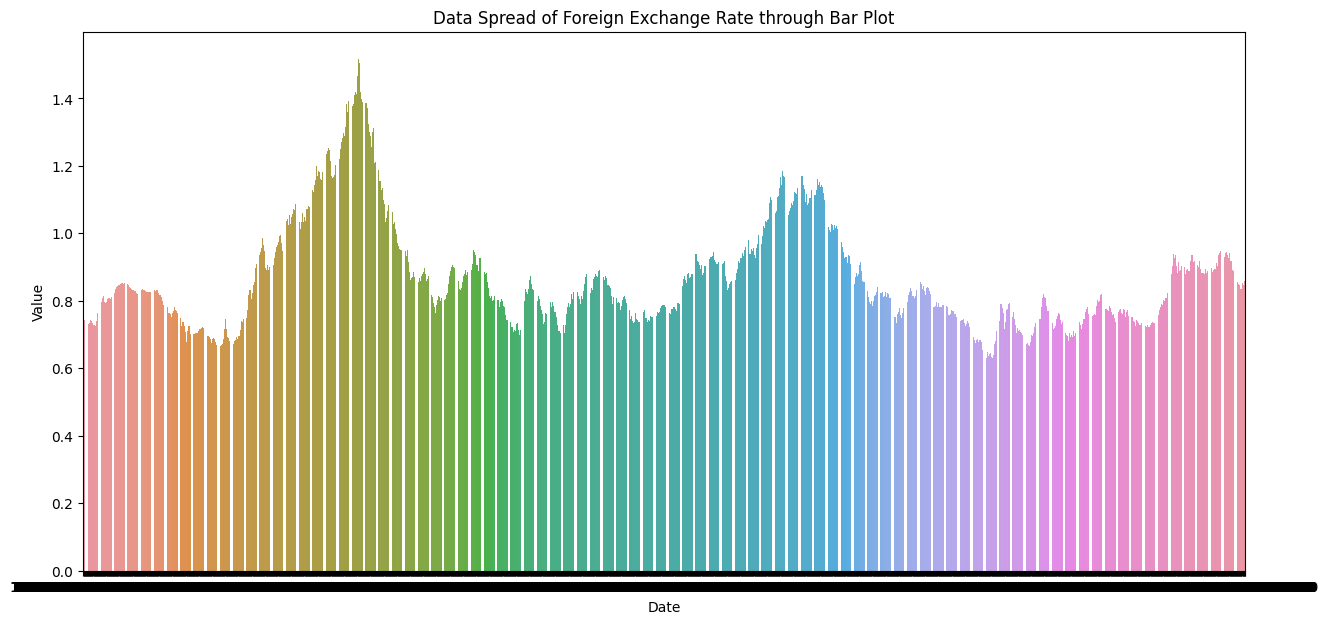

In [18]:
sns.barplot(data = df_week,x = df_week.index , y = df_week.Value)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.savefig('Data Spread of Foreign Exchange Rate through Bar Plot.png')
plt.show()

**_Plotting the dist plot using seaborn to show the data distribution in the resampled weekly dataset and saving the png file._**

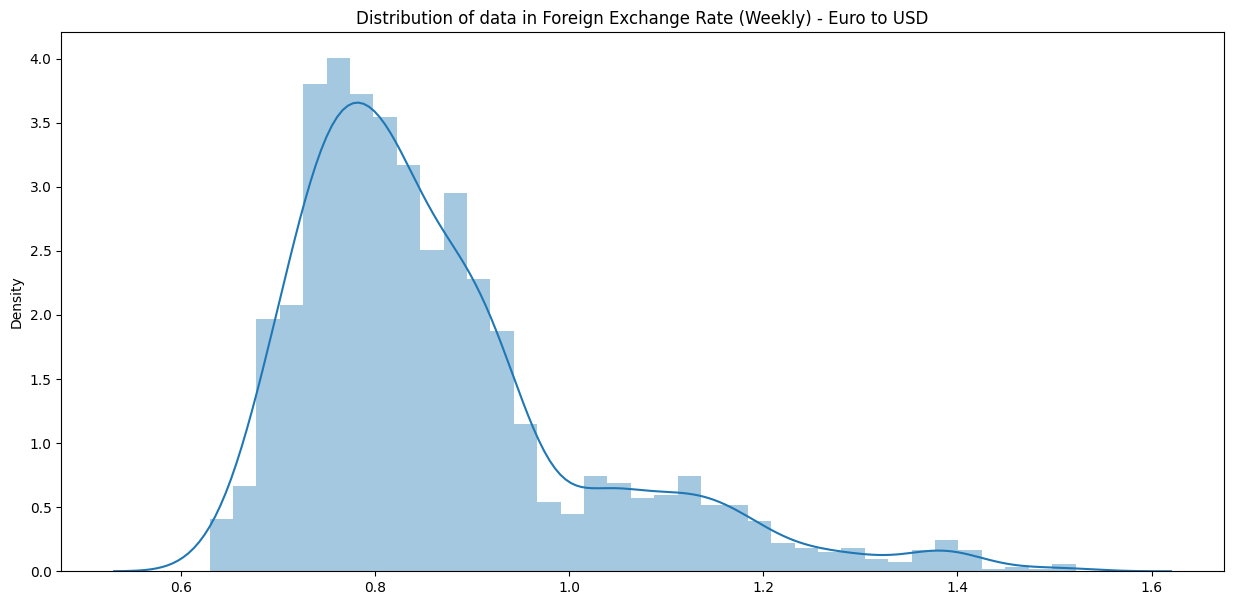

In [19]:
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD.png')
plt.show()

**_Plotting the histogram and KDE line graph to show the distribution of data in the dataset and saving the graph as PNG File_**

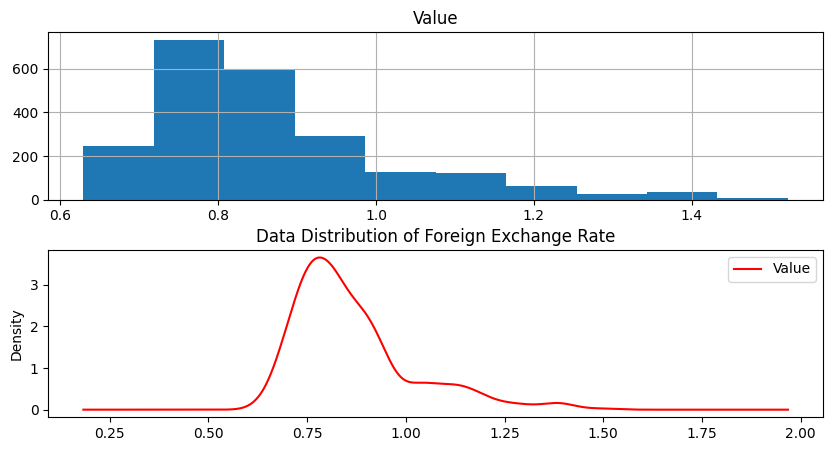

In [20]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

**_Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal , residuals and saving the graph as PNG file._**

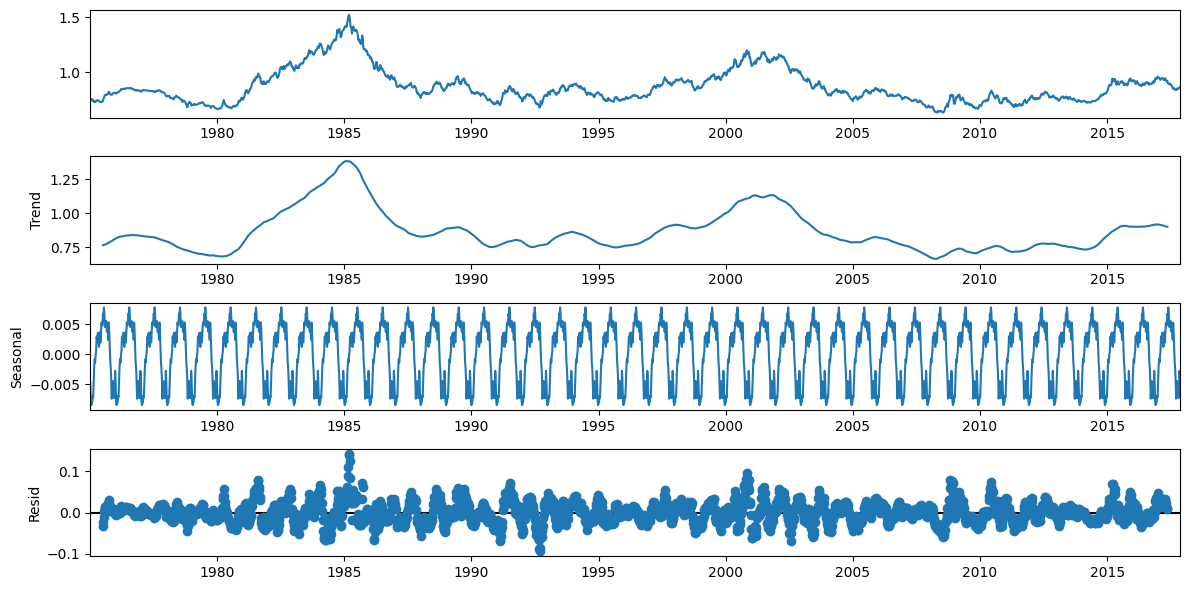

In [21]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week , period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

**_Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset and saving the graph as PNG file_**

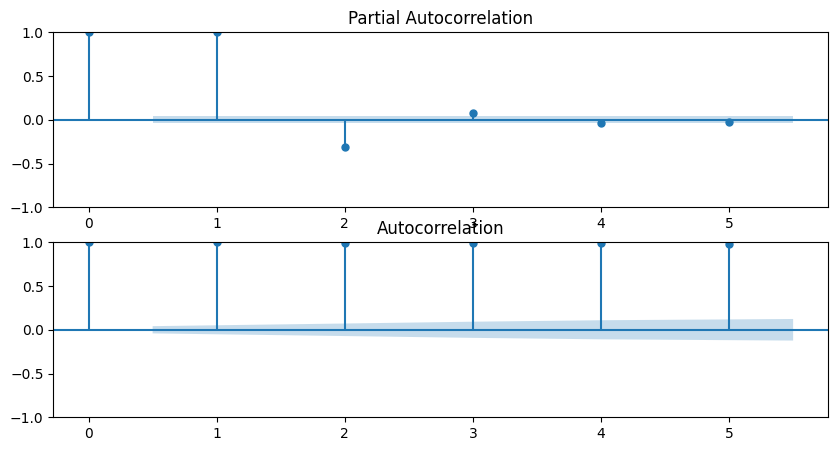

In [22]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

## _Data Transformation_

**_The adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not._**

In [23]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

**_Performing the Augmented Dickey Fuller Test on the original data in the  resampled weekly dataset to find whether the time series is a stationary or not_**

In [24]:
adf_check(df_week)

Test Statistic                   -2.076341
p-value                           0.254134
Number of Lags Used               2.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


**_Since the time series is not a stationary , the resampled weekly dataset is transformed as a new dataframe with first difference to make it as a stationary series. Along with that showing number of observation in the new dataframe and displaying the first five record of the new data frame_**

In [25]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 2236


,Value
Date,
1975-01-12,-0.00744
1975-01-19,0.00200
1975-01-26,-0.01158
1975-02-02,-0.00486
1975-02-09,0.01004


**_Performing the Augmented Dickey Fuller Test on the new transformed data in the resampled weekly dataset to find whether the time series is a stationary or not_**

In [26]:
adf_check(df1_week)

Test Statistic                  -30.128987
p-value                           0.000000
Number of Lags Used               1.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


**_Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset and saving the graph as PNG File_**

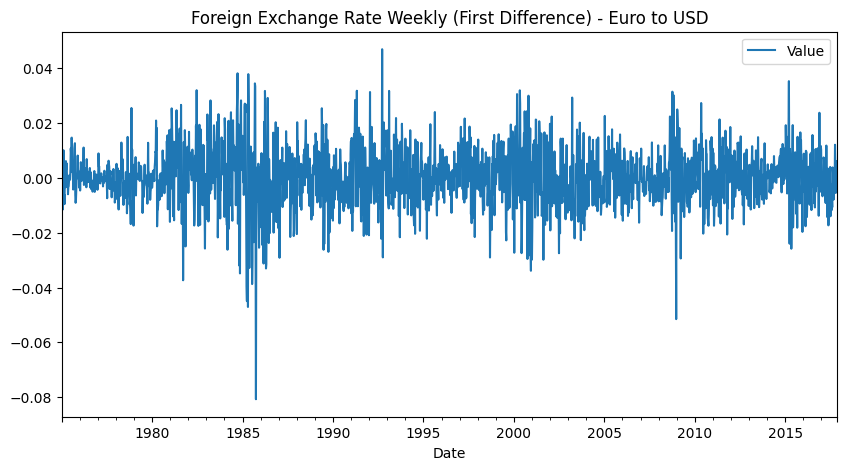

In [27]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - Euro to USD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference) - Euro to USD.png')
plt.show()

**_Plotting the graph with pandas auto correlation plot to show the difference between the stationary data and non - stationary data and saving it as png file._**

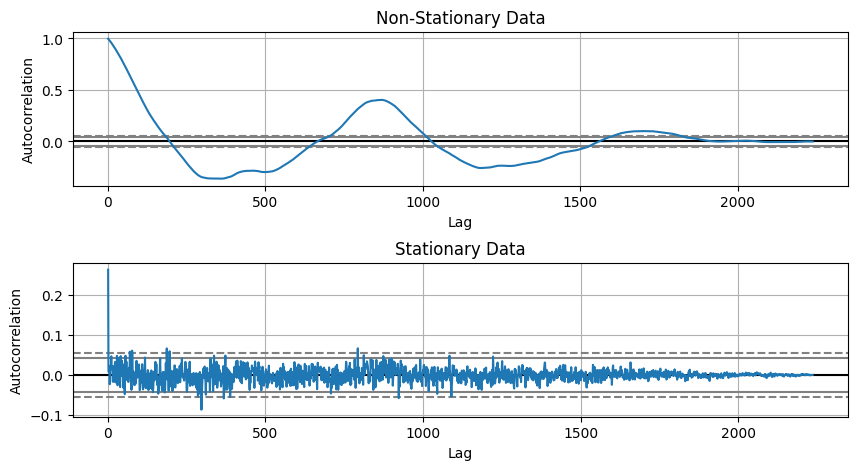

In [28]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

## _Model Fitting_
**_Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters , the best model is evaluated by least Akaike Information Criterion (AIC)_**

In [29]:
model = auto_arima(df_week , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14195.726, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14039.528, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14196.131, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14200.250, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14041.486, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14199.705, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14199.738, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14197.726, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14202.222, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14201.680, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14201.713, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14198.107, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14199.700, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.682 seco

**_Defining the summary of the model fitted with auto_arima function , here getting various information such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) , Hannan-Quinn Information Criterion (HQIC), Log Likelihood etc. From which we can evaluate the model_**

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2237
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7103.111
Date:                Sat, 22 Feb 2025   AIC                         -14202.222
Time:                        10:33:53   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               635.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Fitting the model in ARIMA Model with the Best value got from the `auto_arima` in the training data and getting the summary of the fitted model._**

In [31]:
model = ARIMA(df_week , order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(0, 1, 1)   Log Likelihood                7103.111
Date:                Sat, 22 Feb 2025   AIC                         -14202.222
Time:                        10:33:54   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               635.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Plotting the diagnostic plot for the fitted model to show the best fit of the model and saving it as png file_**

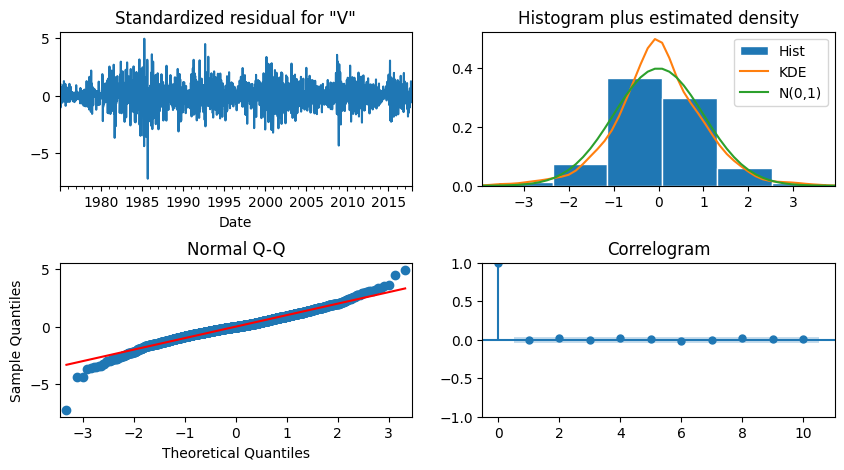

In [32]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

**_Predicting the value using fitted model with whole resampled weekly data_**

In [33]:
predictions = result.predict(typ = 'levels')

## _Model Evaluation_
**_Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and whole data value._**

In [34]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Value'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Value'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Value'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Value'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Value'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 98.46 % 

Mean Squared Error :  0.00036069121331298745 

Mean Absolute Error :  0.007796562268749336 

Root Mean Squared Error :  0.018991872296142565 

Mean Absolute Percentage Error : 0.89 %


## _Result_
**_Concating the Resampled weekly dataset and weekly first difference dataframe and the prediction value and naming the columns as `Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate` and exporting the dataframe to [Comma Seperated Value (CSV)] file. Also displaying the first five records of the exported dataframe._**

In [35]:
Final_data = pd.concat([df_week,df1_week,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (Euro To USD).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
Date,,,
1975-01-05,0.76090,NaN,0.000000
1975-01-12,0.75346,-0.00744,0.760900
1975-01-19,0.75546,0.00200,0.751555
1975-01-26,0.74388,-0.01158,0.756530
1975-02-02,0.73902,-0.00486,0.740396


## _Model Testing_
**_Splliting the Resampled Weekly Dataset into training data and test data. Displaying the number of observations in both training data and test data._**

In [36]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Value'] , df_week[size:(len(df_week))]['Value']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  1789
Counts of Train Data :  448


**_Creating the list of train dataset values in train_values and empty predictions list which will be appended after the prediction. Then fitting the model with ARIMA model with the best value got from auto_arima model in the train_values data and predicting with test data value and appending it to the predictions list and printing the comparison between predicted value and actual value_**

In [37]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 0.752641 , Actual = 0.759475
Predicted = 0.761367 , Actual = 0.767060
Predicted = 0.768637 , Actual = 0.757880
Predicted = 0.754904 , Actual = 0.747075
Predicted = 0.744907 , Actual = 0.734700
Predicted = 0.731868 , Actual = 0.728480
Predicted = 0.727540 , Actual = 0.714175
Predicted = 0.710462 , Actual = 0.705880
Predicted = 0.704607 , Actual = 0.714900
Predicted = 0.717761 , Actual = 0.719660
Predicted = 0.720188 , Actual = 0.715400
Predicted = 0.714069 , Actual = 0.711920
Predicted = 0.711323 , Actual = 0.716960
Predicted = 0.718527 , Actual = 0.712280
Predicted = 0.710545 , Actual = 0.703260
Predicted = 0.701235 , Actual = 0.707200
Predicted = 0.708857 , Actual = 0.696640
Predicted = 0.693251 , Actual = 0.703760
Predicted = 0.706666 , Actual = 0.704920
Predicted = 0.704437 , Actual = 0.699480
Predicted = 0.698108 , Actual = 0.701300
Predicted = 0.702183 , Actual = 0.688660
Predicted = 0.684922 , Actual = 0.681380
Predicted = 

**_Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data._**

In [38]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 98.96 % 

Mean Squared Error :  6.68151924994419e-05 

Mean Absolute Error :  0.006431044707780577 

Root Mean Squared Error :  0.008174056061677207 

Mean Absolute Percentage Error : 0.81 %


**_Making the predicted value as series and index as same as Test Data index since the prediction is based on test data_**

In [39]:
predictions_df = pd.Series(prediction, index = test.index)

**_Plotting the graph with predicted data and resampled weekly data index since the prediction is based on test data._**

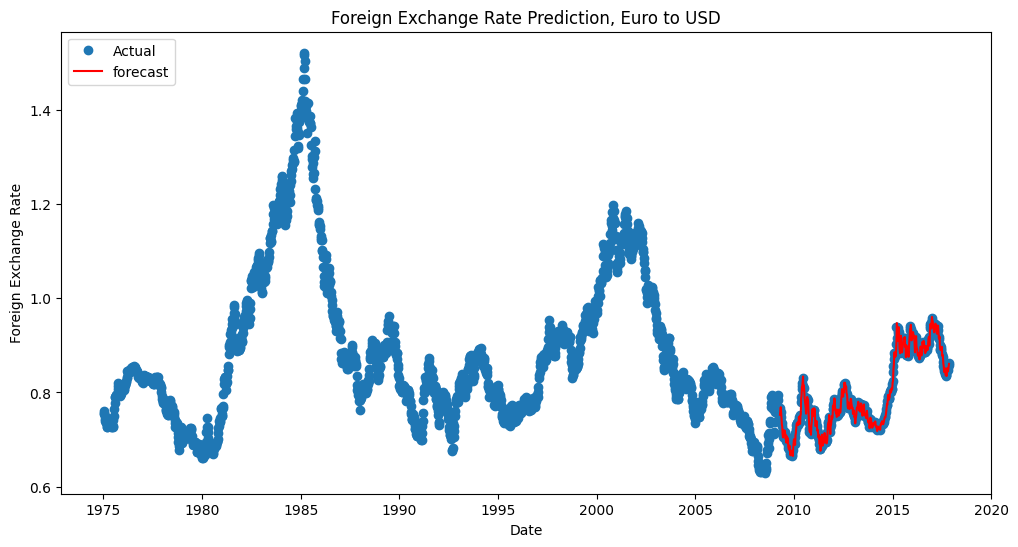

In [40]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction - Euro to USD.png')

**_Creating the pickle file with the best model that gives the high evaluation score for the test data._**